In [1]:
import os

import numpy as np
import pandas as pd
from result_manager.result_manager import ResultManager

In [7]:
home_path = os.path.expanduser('~')
# user_name = 'nmuller'

reduced_number_channels_and_timepoints = True

# gcs = True
tupels_gcs = []
results_dir = f'{home_path}/projects/lgnpy/results/rgc_on_imfov'
# results_dir = f'{home_path}/projects/lgnpy/results/larger_sc_ce'
# results_dir = f'{home_path}/projects/oads_access/results'
lgn_stats_result_manager = ResultManager(root=results_dir)
lgn_stats_result_manager_larger_sc = ResultManager(root=results_dir)

for result_filename_inset in ['_gcs_reduced-2155x1440']:#, '_gcs_reduced-1077x720', '_gcs_reduced-538x360']:
                            # '_3400x2271', '_gcs_reduced-4'
                            # '_reduced-4', '_reduced-40', '_gcs_reduced-40', '_reduced-20', '_gcs_reduced-20'
                            # '_107x72', '_215x144', '_2155x1440', '_gcs'
                            #'_gcs', '_gcs_high_res', '', '_reduced-4', '_gcs_reduced-4', '_reduced-10', '_gcs_reduced-10', '_reduced-20', '_gcs_reduced-20', '_high_res']:
                            # '_rgb',  '_gcs_rgb',
                            #   '_gcs_larger_sc-10',
                            #   '_gcs_reduced-25', '_reduced-25',
                            #   '_high_res_larger_sc-10', '_gcs_larger_sc-15', '_gcs_rgb_larger_sc-15', '_larger_sc-15',
                            #   '_gcs_high_res_larger_sc-20', '_gcs_larger_sc-20', '_gcs_rgb_larger_sc-20', '_larger_sc-20',
                            #   '_gcs_larger_sc-25', '_gcs_rgb_larger_sc-25', '_larger_sc-25'
                            #   ]:
    if 'larger_sc' in result_filename_inset:
        larger_sc_folder = f"larger_sc-{result_filename_inset.split('larger_sc-')[-1]}"
        lgn_stats_result_manager_larger_sc.load_result(path=os.path.join(results_dir, larger_sc_folder), filename=f'oads{result_filename_inset}_lgn_statistics.pkl')
    else:
        lgn_stats = lgn_stats_result_manager.load_result(filename=f'oads{result_filename_inset}_lgn_statistics.pkl')
        # lgn_stats = lgn_stats_result_manager.load_result(filename=f'lgn_statistics.pkl')


    sc = lgn_stats['SC']
    ce = lgn_stats['CE']
    filenames = lgn_stats['filenames']
    lgn_stats_filename_indices = {x: i for i, x in enumerate(filenames)}


    tupels_gcs.append(
        (sc, ce, lgn_stats_filename_indices, result_filename_inset)
    )


# with multiprocessing.Pool(8) as pool:
#     results = list(tqdm.tqdm(pool.imap(iterate, [(sub, home_path, reduced_number_channels_and_timepoints, filenames, tupels) for sub in range(5, 33)]), total=len(range(5, 33))))

# for sub in tqdm.tqdm(range(5,11)):
#     iterate((sub, home_path, reduced_number_channels_and_timepoints, filenames, tupels))

In [6]:
home_path = os.path.expanduser('~')
# user_name = 'nmuller'

reduced_number_channels_and_timepoints = True

# gcs = True
tupels_raw = []
results_dir = f'{home_path}/projects/lgnpy/results/correct_viewing_dist'
# results_dir = f'{home_path}/projects/lgnpy/results/larger_sc_ce'
# results_dir = f'{home_path}/projects/oads_access/results'
lgn_stats_result_manager = ResultManager(root=results_dir)
lgn_stats_result_manager_larger_sc = ResultManager(root=results_dir)

for result_filename_inset in ['_2155x1440']:
                            # '_3400x2271', '_gcs_reduced-4'
                            # '_reduced-4', '_reduced-40', '_gcs_reduced-40', '_reduced-20', '_gcs_reduced-20'
                            # '_107x72', '_215x144', '_2155x1440', '_gcs'
                            #'_gcs', '_gcs_high_res', '', '_reduced-4', '_gcs_reduced-4', '_reduced-10', '_gcs_reduced-10', '_reduced-20', '_gcs_reduced-20', '_high_res']:
                            # '_rgb',  '_gcs_rgb',
                            #   '_gcs_larger_sc-10',
                            #   '_gcs_reduced-25', '_reduced-25',
                            #   '_high_res_larger_sc-10', '_gcs_larger_sc-15', '_gcs_rgb_larger_sc-15', '_larger_sc-15',
                            #   '_gcs_high_res_larger_sc-20', '_gcs_larger_sc-20', '_gcs_rgb_larger_sc-20', '_larger_sc-20',
                            #   '_gcs_larger_sc-25', '_gcs_rgb_larger_sc-25', '_larger_sc-25'
                            #   ]:
    if 'larger_sc' in result_filename_inset:
        larger_sc_folder = f"larger_sc-{result_filename_inset.split('larger_sc-')[-1]}"
        lgn_stats_result_manager_larger_sc.load_result(path=os.path.join(results_dir, larger_sc_folder), filename=f'oads{result_filename_inset}_lgn_statistics.pkl')
    else:
        lgn_stats = lgn_stats_result_manager.load_result(filename=f'oads{result_filename_inset}_lgn_statistics.pkl')
        # lgn_stats = lgn_stats_result_manager.load_result(filename=f'lgn_statistics.pkl')


    sc = lgn_stats['SC']
    ce = lgn_stats['CE']
    filenames = lgn_stats['filenames']
    lgn_stats_filename_indices = {x: i for i, x in enumerate(filenames)}


    tupels_raw.append(
        (sc, ce, lgn_stats_filename_indices, result_filename_inset)
    )


# with multiprocessing.Pool(8) as pool:
#     results = list(tqdm.tqdm(pool.imap(iterate, [(sub, home_path, reduced_number_channels_and_timepoints, filenames, tupels) for sub in range(5, 33)]), total=len(range(5, 33))))

# for sub in tqdm.tqdm(range(5,11)):
#     iterate((sub, home_path, reduced_number_channels_and_timepoints, filenames, tupels))

In [36]:
gcs_filenames = tupels_gcs[0][2]
raw_filenames = tupels_raw[0][2]

share_filenames = np.intersect1d(list(gcs_filenames.keys()), list(raw_filenames.keys()))
gcs_filename_indices = [gcs_filenames[x] for x in share_filenames]
raw_filename_indices = [raw_filenames[x] for x in share_filenames]

gcs_sc = np.array(tupels_gcs[0][0])[gcs_filename_indices]
gcs_ce = np.array(tupels_gcs[0][1])[gcs_filename_indices]

raw_sc = np.array(tupels_raw[0][0])[raw_filename_indices]
raw_ce = np.array(tupels_raw[0][1])[raw_filename_indices]

In [38]:
gcs_ce.shape, raw_ce.shape

((2763, 3, 1, 2), (2763, 3, 1, 2))

In [14]:
import matplotlib.pyplot as plt

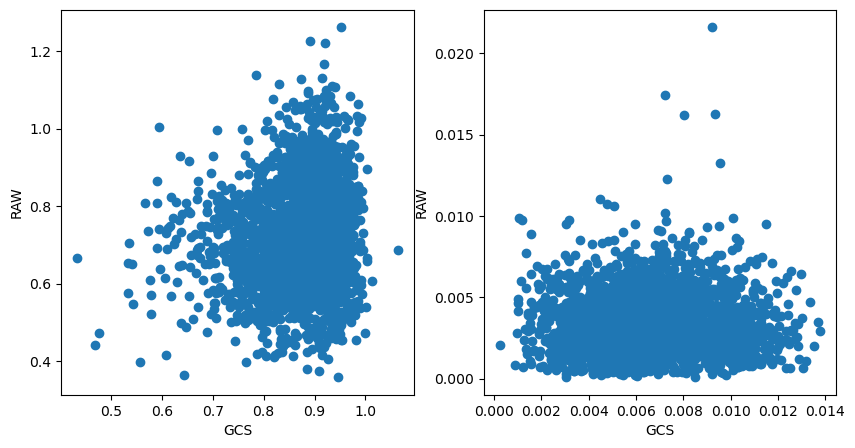

In [42]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(gcs_sc[:, 0,0,0], raw_sc[:,0,0,0])
ax[1].scatter(gcs_ce[:, 0,0,0], raw_ce[:,0,0,0])

ax[0].set_xlabel('GCS')
ax[1].set_xlabel('GCS')
ax[0].set_ylabel('RAW')
ax[1].set_ylabel('RAW')

plt.show()